In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
import time
from tqdm import tqdm
from IPython import display
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import skimage as ski
import math
import pandas as pd

In [2]:
ringModel = load_model("C:/Users/naresh\OneDrive - STERIS Corporation\Documents\models\Ring Fixture 11-21/75.h5")
fixModel = load_model("C:/Users/naresh/OneDrive - STERIS Corporation/Documents/models/Fixture Mask 11-25/138.h5")
#ringModel = load_model("C:/Users/naresh\OneDrive - STERIS Corporation\Documents\models\Ring Fixture 11-21\87.h5")
#fixModel = load_model("C:/Users/naresh\OneDrive - STERIS Corporation\Documents\models\Fixture Mask 11-25/33.h5")

In [3]:
#imagePath = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\Model Training/00- Full Image Dataset\IMG_003.JPG"
#imagePath = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\IMG_0468.JPG"
imagePath = "W:\Advanced Engineering\Advanced Engineering Tests\Testing Reports\Test_896 Vortex Image Processing Code\IMG_0596_sym.jpg"
#imagePath = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\Model Training/00- Full Image Dataset\IMG_00002.JPG"
#imagePath = "C:/Users/naresh/OneDrive - STERIS Corporation/Documents/tmpImg/IMG_00002.JPG"
#imagePath = "W:\Advanced Engineering\Advanced Engineering Tests\Testing Reports\Test_896 Vortex Image Processing Code\IMG_0596_asym.jpg"

(1, 1536, 2304)


1/1 [==============================] - 34s 34s/step


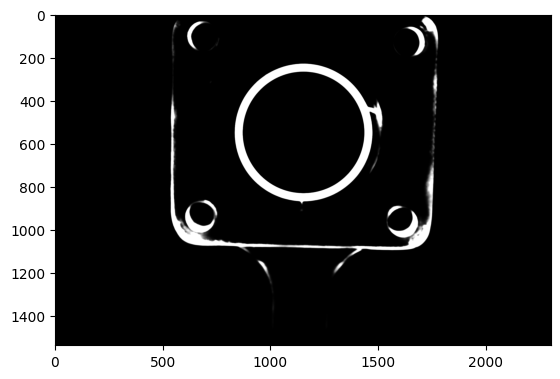

In [4]:
#testImg = image.load_img(imagePath, color_mode='grayscale')
testImg = cv2.imread(imagePath, 0)
testImg = cv2.resize(testImg, (576*4, 384*4))
#testImg = np.reshape(testImg, (384, 576))
testImg = np.expand_dims(testImg, axis=0)
print(testImg.shape)
testImg = testImg/255
imOut = ringModel.predict(testImg)
imOut = imOut.reshape(testImg.shape[1:3])
ringMask = imOut
plt.imshow(imOut, cmap='gray')

1/1 [==============================] - 27s 27s/step


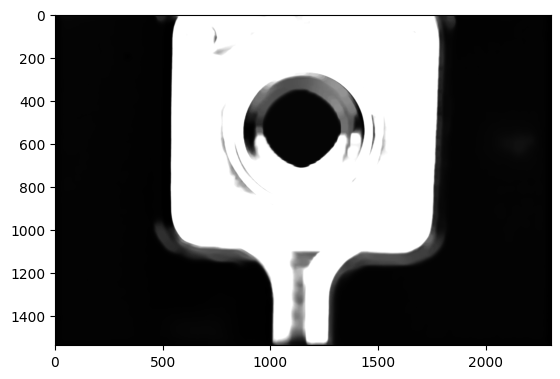

: 

In [14]:
imOut = fixModel.predict(testImg)
imOut = imOut.reshape(testImg.shape[1:3])
plt.imshow(imOut, cmap='gray')
openingKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,10))
imOut = cv2.morphologyEx(imOut, cv2.MORPH_OPEN, openingKernel, iterations = 3)
plt.imshow(imOut, cmap='gray')
fixMask = imOut

[[7.1725249e-02 8.6491868e-02 2.8090926e-02 ... 2.1766636e-01
  2.8289631e-01 3.5767159e-01]
 [1.3200473e-02 5.4547926e-03 6.5080757e-04 ... 4.3517493e-02
  6.6136636e-02 1.5259452e-01]
 [5.6567374e-03 4.0720636e-04 1.2168514e-05 ... 1.9363003e-03
  5.2018394e-03 4.1476388e-02]
 ...
 [1.1985924e-01 4.5206577e-02 4.7814469e-03 ... 1.4972037e-02
  4.5303162e-02 1.5399447e-01]
 [1.9278756e-01 8.9062579e-02 1.8851982e-02 ... 4.4817965e-02
  9.7508051e-02 2.3151214e-01]
 [3.6171439e-01 2.2176597e-01 1.0240727e-01 ... 1.4334151e-01
  2.0492195e-01 2.9029062e-01]]


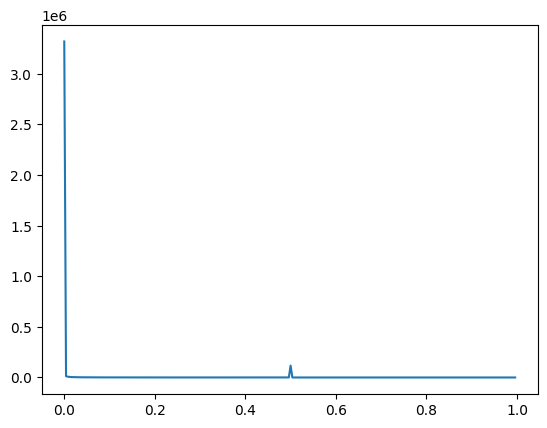

In [6]:
histoGrayRing = ski.util.img_as_float(ringMask)
print(histoGrayRing)
histogram, bin_edges = np.histogram(histoGrayRing, bins=256, range=(0, 1))
plt.plot(bin_edges[0:-1], histogram)

In [7]:
vals, counts = np.unique(histoGrayRing, return_counts = True)
colors = vals[counts > 50]
print(colors[-1])

0.5001259


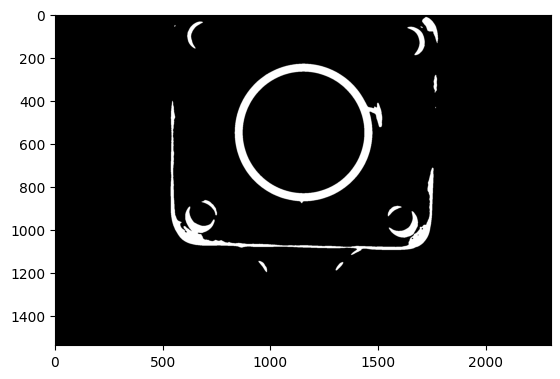

In [8]:
ringMaskThresh = cv2.inRange(ringMask*255, np.round(colors[-1]*255-50), 255)
plt.imshow(ringMaskThresh, cmap='gray')

[[0.00483325 0.00483325 0.00483325 ... 0.00213882 0.00213882 0.00213882]
 [0.00483325 0.00483325 0.00483325 ... 0.00213882 0.00213882 0.00213882]
 [0.00483325 0.00483325 0.00483325 ... 0.00213882 0.00213882 0.00213882]
 ...
 [0.00303238 0.00303238 0.00303238 ... 0.00157756 0.00157756 0.00157756]
 [0.00303238 0.00303238 0.00303238 ... 0.00157756 0.00157756 0.00157756]
 [0.00303238 0.00303238 0.00303238 ... 0.00157756 0.00157756 0.00157756]]


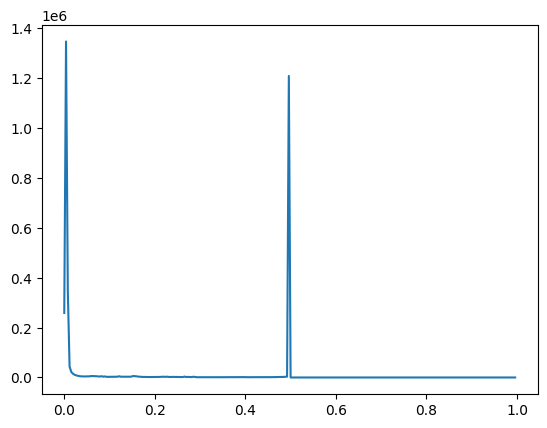

In [9]:
histoGrayFix = ski.util.img_as_float(fixMask)
print(histoGrayFix)
histogram, bin_edges = np.histogram(histoGrayFix, bins=256, range=(0, 1))
plt.plot(bin_edges[0:-1], histogram)

0.4995105


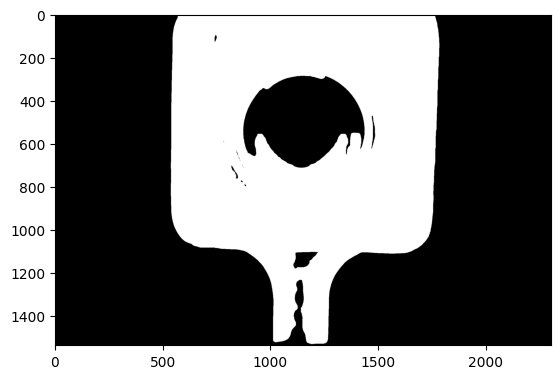

In [10]:
vals, counts = np.unique(histoGrayFix, return_counts = True)
colors = vals[counts > 50]
print(colors[-1])
fixMaskThresh = cv2.inRange(fixMask*255, np.round(colors[-1]*255-50), 255)
plt.imshow(fixMaskThresh, cmap='gray')

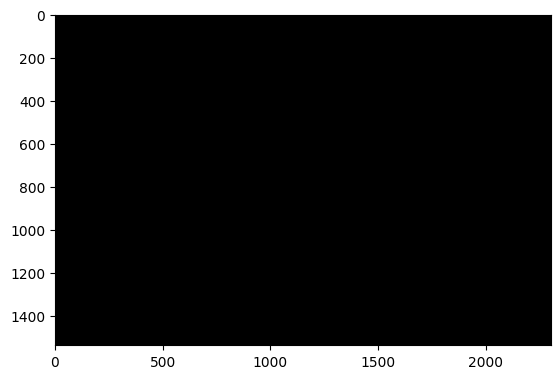

In [11]:
temp = np.bitwise_and(ringMaskThresh, np.bitwise_xor(ringMaskThresh, fixMaskThresh))
openingKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
temp = cv2.morphologyEx(temp, cv2.MORPH_OPEN, openingKernel, iterations = 3)
plt.imshow(temp, cmap='gray')
ringMaskThresh = temp

[[[25 21 22]
  [26 22 23]
  [22 20 21]
  ...
  [19 17 18]
  [16 14 15]
  [17 15 16]]

 [[23 19 20]
  [25 21 22]
  [21 19 20]
  ...
  [18 16 21]
  [15 13 14]
  [17 15 16]]

 [[25 21 22]
  [24 20 21]
  [24 20 21]
  ...
  [16 16 18]
  [18 16 17]
  [18 16 17]]

 ...

 [[24 18 22]
  [23 17 21]
  [23 17 21]
  ...
  [18 16 17]
  [19 15 16]
  [23 19 20]]

 [[25 19 21]
  [23 17 19]
  [24 20 21]
  ...
  [16 16 18]
  [17 15 16]
  [17 15 16]]

 [[24 18 20]
  [24 18 20]
  [25 21 22]
  ...
  [17 17 19]
  [15 17 16]
  [16 18 17]]]


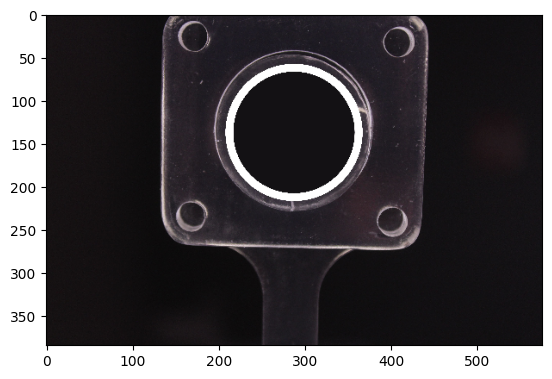

In [12]:
origImg = cv2.imread(imagePath)
origImg = cv2.cvtColor(origImg, cv2.COLOR_BGR2RGB)
origImg = cv2.resize(origImg, (576, 384))
plt.imshow(origImg)
print(origImg)

In [13]:
greenBack = np.full(origImg.shape, 0, dtype=np.uint8)
greenBack[:,:,1] = 255
freezeGreen = cv2.bitwise_or(greenBack, greenBack, mask=ringMaskThresh)
print(greenBack.shape)
print(ringMaskThresh.shape)
overlay = cv2.addWeighted(origImg, 0.5, freezeGreen, 0.5, gamma = 0)
plt.imshow(overlay)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


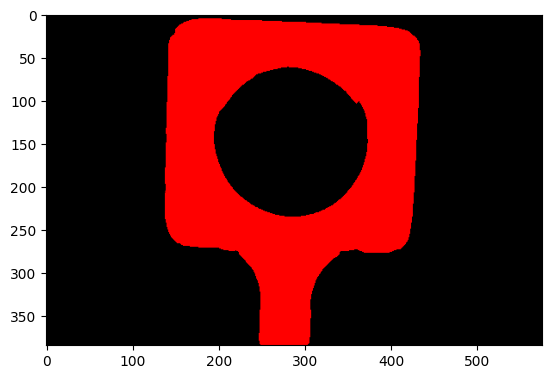

In [ ]:
redBack = np.full(origImg.shape, 0, dtype=np.uint8)
redBack[:,:,0] = 255
fixRed = cv2.bitwise_or(redBack, redBack, mask=fixMaskThresh)
plt.imshow(fixRed)

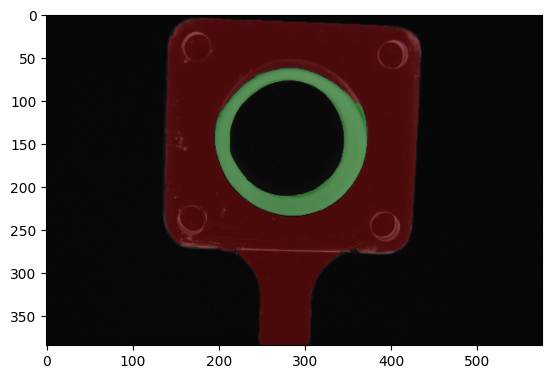

In [ ]:
overlay = cv2.addWeighted(origImg, 2/3, freezeGreen, 1/3, gamma = 0)
finalOut = cv2.addWeighted(overlay, 0.75, fixRed, 0.25, gamma = 0)
plt.imshow(finalOut)

[[[-1 -1  1 -1]
  [-1 -1 -1  0]]]
<class 'int'>


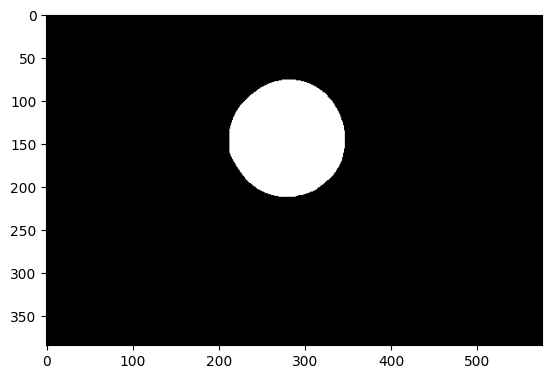

{'m00': 3654405.0, 'm10': 1023049035.0, 'm01': 526022415.0, 'm20': 290533805535.0, 'm11': 147220076925.0, 'm02': 79923342615.0, 'm30': 83645958890745.0, 'm21': 41799157814445.0, 'm12': 22365247687635.0, 'm03': 12713892382755.0, 'mu20': 4131688633.772278, 'mu11': -39661405.62277222, 'mu02': 4206616887.437729, 'mu30': -2177954202.890625, 'mu21': 1343149359.2097168, 'mu12': 2161779117.976074, 'mu03': -1452316432.4921875, 'nu20': 0.000309381422916225, 'nu11': -2.9698516016265556e-06, 'nu02': 0.00031499206103308624, 'nu30': -8.531139671369601e-08, 'nu21': 5.2611734295058146e-08, 'nu12': 8.467781172637555e-08, 'nu03': -5.6887855199948304e-08}
279 143


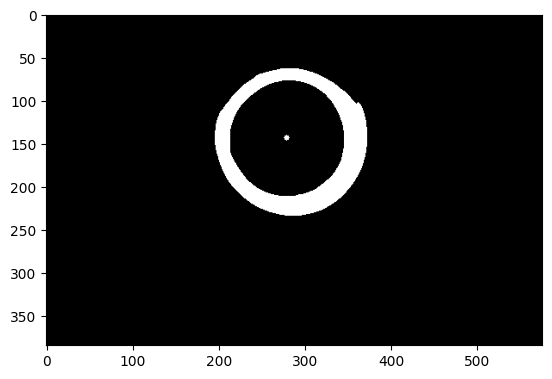

In [ ]:
mask = ringMaskThresh

contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)

inCircle = np.zeros(mask.shape)

lengths = []
outerRingCount = 0
innerRingCount = 0
innerRingIdx = -1
print(type(len(contours)))
range((len(contours)))
for i in range(len(contours)):
    #hard-coded. If the image ever changes or the code is repurposed for something else this needs to change
    #this is used to find the center and with the current fixture the central circle is always hierarchy order #2
    # if the center of another portion needs to be found, then change the value down below
    if (len(contours[i]) > outerRingCount):
        outerRingCount = len(contours[i])
    elif (len(contours[i]) > innerRingCount):
        innerRingCount = len(contours[i])
        innerRingIdx = i
    # if hierarchy[0][i][2] != -1:
    #     cv2.drawContours(inCircle, contours,hierarchy[0][i][2],255,-1)
    #     print(i)
    # contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # inCircle = np.zeros(mask.shape)
    # for i in range(len(contours)):
    #     if hierarchy[0][i][2] != -1:
    #         cv2.drawContours(inCircle, contours,hierarchy[0][i][2],255,-1)
    #         print(i)
    # M = cv2.moments(inCircle)
    # print(M)
    # cX = int(M["m10"] / M["m00"])
    # cY = int(M["m01"] / M["m00"])

cv2.drawContours(inCircle, contours,innerRingIdx,255,-1)        
plt.imshow(inCircle, cmap='gray')
plt.show()

#uses the inner circle to calculate the centroid
#since the circle isn't perfect using the method of centroid to find the center
#calculates the moment of every point in the center to calculate cX and cY

M = cv2.moments(inCircle)
print(M)

fullThickCenter = mask.copy()
# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

#Display the calculated centroid on the black and white fullThick image
cv2.circle(fullThickCenter, (cX, cY), 3, 255, -1)
plt.imshow(fullThickCenter, cmap = 'gray')
print(cX, cY)

In [ ]:
# temp = np.zeros(mask.shape)
# cv2.drawContours(temp, contours, 2, 255, -1)
# plt.imshow(temp, cmap='gray')
# plt.show()
# #print(len(contours[]))

In [ ]:
samplingRate = 3

#calculates the minimum distance from the center point to the edges of the image
#makes this the radius of the circle we are sampling
distCenter = [cX, cY, mask.shape[0] - cY, mask.shape[1] - cX]
maxRad = min(distCenter)

#lets us know if the shortest distance is in the x or y direction which is important later on
if distCenter.index(maxRad) == 0 or distCenter.index(maxRad) == 3:
    xShort = True
else:
    xShort = False

startX = cX
startY = cY
lineLength = maxRad

thicknessProfile = []

#i is the degree at which we are sampling
#essentially draws a white line of length maxRad from the center in the degree specified on a black background
#looks at the intersection of the white line with the white ring to see where there is overlap
#Calculates thickness by taking the # pixels in the overlap section and dividing by the # pixels in the full line
#multiplies this ratio by the pixel length to get straight thickness of the image
#adds a tuple of the degree and the length to an array called thicknessProfile. Repeats for all degrees
for j in range(360*samplingRate):
    i = j/samplingRate
    lineMask = np.zeros(mask.shape)
    endX = math.floor(cX + math.cos(math.radians(i))*lineLength)
    endY = math.floor(cY + math.sin(math.radians(i))*lineLength)
    cv2.line(lineMask, (startX, startY), (endX, endY), 255, 25)
    currSlice = np.bitwise_and((np.ceil(mask/255)).astype(int), (np.ceil(lineMask/255)).astype(int))
    count = (np.count_nonzero(currSlice) / np.count_nonzero(lineMask)) * lineLength
    thicknessProfile.append((i,count))

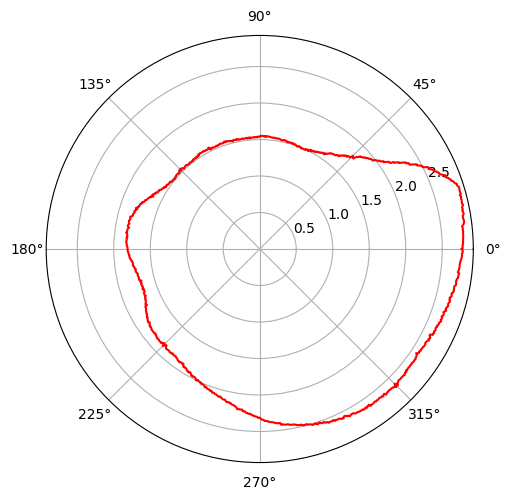

In [ ]:
pixWidth = max(fixMaskThresh.sum(axis=1)) / 255
mm2pix = 34/pixWidth

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
fig.tight_layout(pad=0)
x, y = zip(*thicknessProfile)
x = np.array(x)
y = np.array(y)*mm2pix
x = 360-x
rads = x.astype('float') * np.pi/180
ax.plot(rads, y, color='red')
plt.show()
fig.canvas.draw()

C:\Users\naresh\AppData\Local\Temp\ipykernel_560\234217488.py:1: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


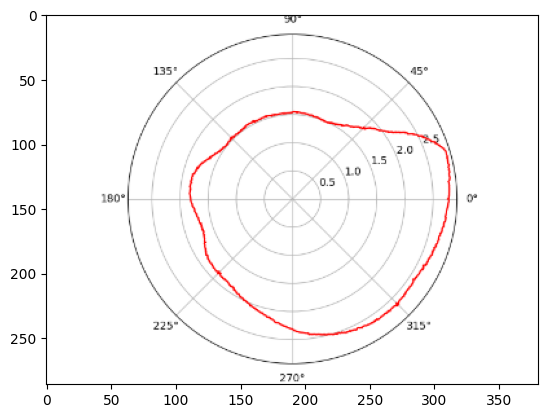

In [ ]:
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
w, h = fig.canvas.get_width_height()
im = data.reshape((int(h), int(w), -1))
if xShort:
    ratio = maxRad*2/w
    graphPic = cv2.resize(im, (maxRad*2, int(ratio*int(h))))
else:
    ratio = maxRad*2/h
    graphPic = cv2.resize(im, (int(ratio*w), maxRad*2)) 

plt.imshow(graphPic)

In [ ]:
def plot_overlay(back, fore):
    #calculates the section of the background where the foreground image is going to be placed
    #this is done with the centroid and the length and width of the foreground image
    xOff = cX - int(fore.shape[1]/2)
    yOff = cY - int(fore.shape[0]/2)
    roi = back[yOff:yOff+fore.shape[0], xOff:xOff+fore.shape[1]]

    #converts the graph to a black and white copy. This part is hard coded because we know that the background is white
    #and anything that is non-white must belong to the graph
    #for other images, this threshold needs to be changed especially if this code is used for something than what is stated above
    back2gray = cv2.cvtColor(fore, cv2.COLOR_RGB2GRAY)
    back2gray = cv2.threshold(back2gray, 245, 255, cv2.THRESH_BINARY)[1]
    maskBack = cv2.bitwise_not(back2gray)
    whiteBack = np.full(fore.shape, 255, dtype=np.uint8)
    bk = cv2.bitwise_or(whiteBack, whiteBack, mask = maskBack)

    #uses the mask from above to place the foreground over hte background in the region of interest
    fg = cv2.bitwise_or(fore, fore, mask=maskBack)
    print(roi.shape)
    print(fg.shape)
    plt.imshow(fg)
    finalRoi =  cv2.bitwise_or(roi, fg)

    #replaces the region of interest in the original image with the updated one 
    back[yOff:yOff+fore.shape[0], xOff:xOff+fore.shape[1]] = finalRoi
    back = cv2.resize(back, (back.shape[1]*2, back.shape[0]*2))
    return back, finalRoi

(286, 381, 3)
(286, 381, 3)
(384, 576, 3)
(286, 381, 3)


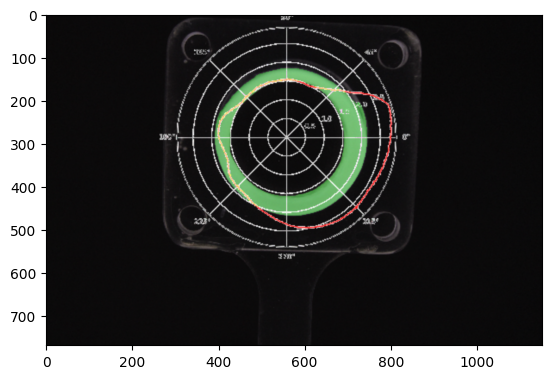

In [ ]:
full, section = plot_overlay(overlay.copy(), graphPic.copy())
print(overlay.shape)
print(graphPic.shape)
plt.imshow(full)